# Project 2

Jennifer Cheng  
DATA71200: Summer 2021  
June 21, 2021  

-----

- **Assignment**: Apply different types of supervised learning algorithms with a range of parameter settings to your data and to observe which performs better.
- **Tip**:  You should make notes on what worked well and what didn’t. Such notes will be useful when you write up the paper for your final project.

In [587]:
import numpy as np
import pandas as pd
import seaborn as sns # for dataset, charts

## Step 1: Load your data, including testing/training split from Project 1

### Your testing and training split should be balanced

In [588]:
penguins_raw = sns.load_dataset("penguins") 
penguins_raw.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [589]:
from sklearn.model_selection import train_test_split

In [590]:
# drop target variable and variable not being used (categorical)
X = penguins_raw.drop(["species"], axis=1)

# target variable
y = penguins_raw["species"]

# split data and labels into a training and a test set without stratifying
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0) 

In [591]:
# Training data (75%) dimensions 
print("X_train shape (rows, columns):", X_train.shape)
print("y_train shape:", y_train.shape)
# Testing data (25%) dimensions 
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape (rows, columns): (258, 6)
y_train shape: (258,)
X_test shape: (86, 6)
y_test shape: (86,)


In [592]:
# Are testing and training sets are balanced in terms of target classes?
y_train.value_counts(normalize=True) * 100

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

In [593]:
y_test.value_counts(normalize=True) * 100

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

### Your data should be clean and missing data should be addressed

**Missing data: training set**

In [594]:
# training features: number of missing values per variable
X_train.isnull().sum()

island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  8
dtype: int64

Results: Features training set has missing values. What are they?

In [595]:
# show rows with missing data
X_train_null = pd.DataFrame(X_train, columns = X.columns)
X_train_null = X_train_null[X_train_null.isnull().any(axis=1)]
X_train_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,NaN
11,Torgersen,37.8,17.3,180.0,3700.0,NaN
324,Biscoe,47.3,13.8,216.0,4725.0,NaN
3,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Torgersen,34.1,18.1,193.0,3475.0,NaN
10,Torgersen,37.8,17.1,186.0,3300.0,NaN
336,Biscoe,44.5,15.7,217.0,4875.0,NaN
246,Biscoe,44.5,14.3,216.0,4100.0,NaN


Result: Only a Torgersen penguin (row 3) is missing numeric data so just remove that row.

In [596]:
# drop row with missing values
X_train_final = X_train.dropna(subset=["bill_length_mm"], axis=0)

# replay
X_train_null = pd.DataFrame(X_train_final, columns = X.columns)
X_train_null = X_train_null[X_train_null.isnull().any(axis=1)]
X_train_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,NaN
11,Torgersen,37.8,17.3,180.0,3700.0,NaN
324,Biscoe,47.3,13.8,216.0,4725.0,NaN
8,Torgersen,34.1,18.1,193.0,3475.0,NaN
10,Torgersen,37.8,17.1,186.0,3300.0,NaN
336,Biscoe,44.5,15.7,217.0,4875.0,NaN
246,Biscoe,44.5,14.3,216.0,4100.0,NaN


Result: Now only the categorical variable of `sex` has missing values. Fill in missing values using most frequent class/label ([source](https://jamesrledoux.com/code/imputation)).

In [597]:
X_train_final = X_train_final.apply(lambda X_train_final: X_train_final.fillna(X_train_final.value_counts().index[0]))
X_train_final

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,Female
110,Biscoe,38.1,16.5,198.0,3825.0,Female
63,Biscoe,41.1,18.2,192.0,4050.0,Male
91,Dream,41.1,18.1,205.0,4300.0,Male
329,Biscoe,48.1,15.1,209.0,5500.0,Male
...,...,...,...,...,...,...
246,Biscoe,44.5,14.3,216.0,4100.0,Female
320,Biscoe,48.5,15.0,219.0,4850.0,Female
280,Biscoe,45.3,13.8,208.0,4200.0,Female
182,Dream,40.9,16.6,187.0,3200.0,Female


In [598]:
# final check of missing training features data
X_train_final.isnull().sum()

island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [599]:
print("No. of missing values for target training set (species):", y_train.isnull().sum())

No. of missing values for target training set (species): 0


In [600]:
# remove row 3 (row that was deleted from training features set)
# y_train_pd = pd.DataFrame(y_train).reset_index()
# y_train_pd.columns = ["orig_index", "species"]
# y_train_pd[y_train_pd["orig_index"]==3]
y_train_final = y_train.drop([3])
y_train_final.shape

(257,)

**Missing data: test set**

In [601]:
# training features: number of missing values per variable
X_test.isnull().sum()

island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  3
dtype: int64

In [602]:
print("No. of missing values for target test set (species):", y_test.isnull().sum())

No. of missing values for target test set (species): 0


In [603]:
# show rows with missing data in test set
X_test_null = pd.DataFrame(X_test, columns = X.columns)
X_test_null = X_test_null[X_test_null.isnull().any(axis=1)]
X_test_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
9,Torgersen,42.0,20.2,190.0,4250.0,NaN
47,Dream,37.5,18.9,179.0,2975.0,NaN
339,Biscoe,NaN,NaN,NaN,NaN,NaN


In [604]:
# drop row 339 with missing values across
X_test_final = X_test.dropna(subset=["bill_length_mm"], axis=0)

# replay
X_test_null = pd.DataFrame(X_test_final, columns = X.columns)
X_test_null = X_test_null[X_test_null.isnull().any(axis=1)]
X_test_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
9,Torgersen,42.0,20.2,190.0,4250.0,NaN
47,Dream,37.5,18.9,179.0,2975.0,NaN


In [605]:
# fill in missing sex values with more frequent class
X_test_final = X_test_final.apply(lambda X_test_final: X_test_final.fillna(X_test_final.value_counts().index[0]))
X_test_final

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
174,Dream,43.2,16.6,187.0,2900.0,Female
225,Biscoe,46.5,13.5,210.0,4550.0,Female
137,Dream,40.2,20.1,200.0,3975.0,Male
223,Biscoe,50.0,15.2,218.0,5700.0,Male
117,Torgersen,37.3,20.5,199.0,3775.0,Male
...,...,...,...,...,...,...
259,Biscoe,48.7,15.7,208.0,5350.0,Male
88,Dream,38.3,19.2,189.0,3950.0,Male
139,Dream,39.7,17.9,193.0,4250.0,Male
77,Torgersen,37.2,19.4,184.0,3900.0,Male


In [606]:
# final check of missing testing features data
X_test_final.isnull().sum()

island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [607]:
# remove row 339 (row that was deleted from test features set)
y_test_final = y_test.drop([339])
y_test_final.shape

(85,)

In [608]:
y_test_final

174    Chinstrap
225       Gentoo
137       Adelie
223       Gentoo
117       Adelie
         ...    
259       Gentoo
88        Adelie
139       Adelie
77        Adelie
255       Gentoo
Name: species, Length: 85, dtype: object

## Step 2: Prepare your data

### Make sure that your all appropriate variables are converted to categorical variables (as ordinal or one hot)

**Encoding variables: training set**

In [609]:
# Apply one-hot encoding to sex (and island) feature
# I used labelEncoder in project 1 but I shouldn't have since the sex of the penguins is not ordinal

X_train_enc = pd.get_dummies(X_train_final)
X_train_enc

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
286,46.2,14.4,214.0,4650.0,1,0,0,1,0
110,38.1,16.5,198.0,3825.0,1,0,0,1,0
63,41.1,18.2,192.0,4050.0,1,0,0,0,1
91,41.1,18.1,205.0,4300.0,0,1,0,0,1
329,48.1,15.1,209.0,5500.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
246,44.5,14.3,216.0,4100.0,1,0,0,1,0
320,48.5,15.0,219.0,4850.0,1,0,0,1,0
280,45.3,13.8,208.0,4200.0,1,0,0,1,0
182,40.9,16.6,187.0,3200.0,0,1,0,1,0


In [610]:
# for target feature (species)
y_train_enc = pd.get_dummies(y_train_final)
y_train_enc

,Adelie,Chinstrap,Gentoo
286,0,0,1
110,1,0,0
63,1,0,0
91,1,0,0
329,0,0,1
...,...,...,...
246,0,0,1
320,0,0,1
280,0,0,1
182,0,1,0


**Encoding variables: testing set**

In [611]:
X_test_enc = pd.get_dummies(X_test_final)
X_test_enc

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
174,43.2,16.6,187.0,2900.0,0,1,0,1,0
225,46.5,13.5,210.0,4550.0,1,0,0,1,0
137,40.2,20.1,200.0,3975.0,0,1,0,0,1
223,50.0,15.2,218.0,5700.0,1,0,0,0,1
117,37.3,20.5,199.0,3775.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
259,48.7,15.7,208.0,5350.0,1,0,0,0,1
88,38.3,19.2,189.0,3950.0,0,1,0,0,1
139,39.7,17.9,193.0,4250.0,0,1,0,0,1
77,37.2,19.4,184.0,3900.0,0,0,1,0,1


In [612]:
# for target feature (species)
y_test_enc = pd.get_dummies(y_test_final)
y_test_enc

,Adelie,Chinstrap,Gentoo
174,0,1,0
225,0,0,1
137,1,0,0
223,0,0,1
117,1,0,0
...,...,...,...
259,0,0,1
88,1,0,0
139,1,0,0
77,1,0,0


### Perform any necessary feature scaling

In [613]:
# Scaling the continuous variables: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# # Subset of the continous variables within the encoded features training set
X_train_enc_sub = X_train_enc[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
# # Apply scaler to the subset
#X_train_enc_scaled = scaler.fit_transform(X_train_enc_sub)
X_train_enc_sub

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
286,46.2,14.4,214.0,4650.0
110,38.1,16.5,198.0,3825.0
63,41.1,18.2,192.0,4050.0
91,41.1,18.1,205.0,4300.0
329,48.1,15.1,209.0,5500.0
...,...,...,...,...
246,44.5,14.3,216.0,4100.0
320,48.5,15.0,219.0,4850.0
280,45.3,13.8,208.0,4200.0
182,40.9,16.6,187.0,3200.0


In [614]:
# # create df from scaled data
X_train_enc_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc_sub), columns=X_train_enc_sub.columns)
X_train_enc_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.433049,-1.393194,0.924877,0.582027
1,-1.060948,-0.299193,-0.205987,-0.447200
2,-0.507616,0.586427,-0.630060,-0.166502
3,-0.507616,0.534331,0.288766,0.145385
4,0.783493,-1.028527,0.571482,1.642443
...,...,...,...,...
252,0.119494,-1.445289,1.066235,-0.104124
253,0.857270,-1.080622,1.278272,0.831537
254,0.267049,-1.705766,0.500803,0.020631
255,-0.544505,-0.247098,-0.983455,-1.226917


In [627]:
X_train_cat = X_train_enc.drop(["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"], axis=1)
X_train_cat

,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
286,1,0,0,1,0
110,1,0,0,1,0
63,1,0,0,0,1
91,0,1,0,0,1
329,1,0,0,0,1
...,...,...,...,...,...
246,1,0,0,1,0
320,1,0,0,1,0
280,1,0,0,1,0
182,0,1,0,1,0


In [628]:
# # combine scaled data with hot-encoded (non-continuous features)
#X_train_enc = 
pd.concat([X_train_cat, X_train_enc_scaled], axis=1)
#X_train_enc

,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.0,0.0,1.0,0.0,1.0,0.433049,-1.393194,0.924877,0.582027
1,0.0,0.0,1.0,1.0,0.0,-1.060948,-0.299193,-0.205987,-0.447200
2,0.0,0.0,1.0,1.0,0.0,-0.507616,0.586427,-0.630060,-0.166502
3,NaN,NaN,NaN,NaN,NaN,-0.507616,0.534331,0.288766,0.145385
4,0.0,0.0,1.0,1.0,0.0,0.783493,-1.028527,0.571482,1.642443
...,...,...,...,...,...,...,...,...,...
337,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
338,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
341,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
342,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [583]:
X_train_enc.shape

(325, 13)

In [584]:
y_train_enc.shape

(257, 3)

## Step 3: Select your target attribute. Based on the data exploration you did in Project 1, select which you are going to predict.

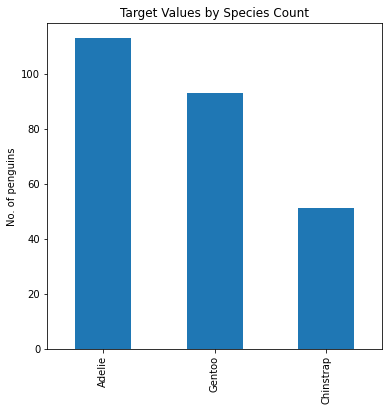

In [572]:
y_train_final.value_counts().plot(kind="bar", figsize=(6,6))
plt.ylabel("No. of penguins")
plt.title("Target Values by Species Count") 
plt.show()

## Step 4: Select two of the following supervised learning algorithms, ideally one from the first half of the list and one from the second half of the list 

- **K-Nearest Neighbor**
  - "k should be larger than the number of classes"
  - "k should not be a multiple of the number of classes"
  - "kNNs do not make any assumptions about the distribution of the data"
  - hyperparameters: # of neighbors, distance measure
- ~~Linear Models~~
- ~~Naïve Bayes~~
- Decision Trees 
  - Single tree - - is there assumption of normal distribution?
  - **Random Forest** - is there assumption of normal distribution?
  - Gradient Descent decision trees
- ~~Support Vectors Machines~~

## Step 5: For each of your selected models

- Run with the default parameters using cross-validation
- Calculate precision, recall, and F1 for classification

### k-nearest neighbors

**Default parameters using cross-validation**

In [573]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier() # default n_neighbors = 5

# # 5-fold CV
cvs = cross_val_score(estimator=knn, X=X_train_enc, y=y_train_enc, cv=5)

print("CV scores: {}".format(cvs))
print("Mean of CV score: {}".format(np.mean(cvs)))
# #print("Standard deviation of CV score: {}".format(np.std(cvs)))

ValueError: Found input variables with inconsistent numbers of samples: [325, 257]

In [261]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

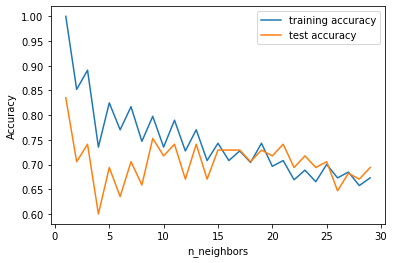

In [434]:
# comparing different values for k (n_neighbors)
training_accuracy = []
test_accuracy = []
# run n_neighbors from 1 to 10
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:
    # build the model
    knn_vis = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm="brute")
    knn_vis.fit(X_train_enc, y_train_enc)
    # record training data accuracy
    training_accuracy.append(knn_vis.score(X_train_enc, y_train_enc))
    # record test/generalization accuracy
    test_accuracy.append(knn_vis.score(X_test_enc, y_test_enc))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Parameter tuning

(Where possible) adjust 2-3 parameters for each model, report evaluation metrics for the best and worst performing parameter settings

**Grid search**

In [466]:
from sklearn.model_selection import GridSearchCV

# dictionary
param_grid = {"n_neighbors": np.arange(4,25), 
              "p": np.arange(1,2), 
              "weights": ["uniform", "distance"]}

# grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train_enc, y_train_enc)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'p': array([1]), 'weights': ['uniform', 'distance']})

In [467]:
# best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [469]:
#accuracy of best performing k
knn_gscv.best_score_

0.8209653092006033

In [476]:
# accuracy on testing data 
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_enc, y_train_enc)
print("Testing data knn score: {}".format(knn.score(X_test_enc, y_test_enc)))

Testing data knn score: 0.7529411764705882


### Calculate precision, recall, and F1

In [490]:
# using hyperparameter results from grid search
knn5 = KNeighborsClassifier(n_neighbors=5, p=1, weights="distance")
knn5.fit(X_train_enc, y_train_enc)

from sklearn.metrics import confusion_matrix
confusion5 = confusion_matrix(y_test_enc.values.argmax(axis=1), knn5.predict(X_test_enc).argmax(axis=1)) # error: https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix
print("Confusion matrix for k=5:\n{}".format(confusion5))


Confusion matrix for k=5:
[[30  6  2]
 [ 9  7  1]
 [ 0  0 30]]


In [499]:
# with just k (default value)
knn5b = KNeighborsClassifier(n_neighbors=5)
knn5b.fit(X_train_enc, y_train_enc)

from sklearn.metrics import confusion_matrix
confusion5b = confusion_matrix(y_test_enc.values.argmax(axis=1), knn5b.predict(X_test_enc).argmax(axis=1))
print("Confusion matrix for k=5:\n{}".format(confusion5b))

Confusion matrix for k=5:
[[26 10  2]
 [10  6  1]
 [ 0  0 30]]


In [502]:
knn9 = KNeighborsClassifier(n_neighbors=9, p=1, weights="distance")
knn9.fit(X_train_enc, y_train_enc)

confusion9 = confusion_matrix(y_test_enc.values.argmax(axis=1), knn9.predict(X_test_enc).argmax(axis=1))
print("Confusion matrix for k=9:\n{}".format(confusion9))

Confusion matrix for k=9:
[[34  2  2]
 [11  5  1]
 [ 0  0 30]]


In [503]:
knn9b = KNeighborsClassifier(n_neighbors=9)
knn9b.fit(X_train_enc, y_train_enc)

confusion9b = confusion_matrix(y_test_enc.values.argmax(axis=1), knn9b.predict(X_test_enc).argmax(axis=1))
print("Confusion matrix for k=9:\n{}".format(confusion9b))

Confusion matrix for k=9:
[[35  0  3]
 [11  5  1]
 [ 1  0 29]]


In [507]:
from sklearn.metrics import classification_report

print(classification_report(y_test_enc.values.argmax(axis=1), knn5.predict(X_test_enc).argmax(axis=1),
                            target_names=["class 1", "class 2", "class 3"]))

              precision    recall  f1-score   support

     class 1       0.72      0.68      0.70        38
     class 2       0.38      0.35      0.36        17
     class 3       0.91      1.00      0.95        30

    accuracy                           0.73        85
   macro avg       0.67      0.68      0.67        85
weighted avg       0.72      0.73      0.72        85



In [510]:
print(classification_report(y_test_enc.values.argmax(axis=1), knn9.predict(X_test_enc).argmax(axis=1),
                            target_names=["class 1", "class 2", "class 3"]))

              precision    recall  f1-score   support

     class 1       0.76      0.89      0.82        38
     class 2       0.71      0.29      0.42        17
     class 3       0.91      1.00      0.95        30

    accuracy                           0.81        85
   macro avg       0.79      0.73      0.73        85
weighted avg       0.80      0.81      0.79        85



## Decision trees: classification

### Default parameters using cross-validation

In [1]:
from sklearn.tree import DecisionTreeClassifiera

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_enc, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train_enc, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

ImportError: cannot import name 'DecisionTreeClassifiera' from 'sklearn.tree' (/Users/jc/anaconda3/envs/adam/lib/python3.8/site-packages/sklearn/tree/__init__.py)

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = iris.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### Calculate precision, recall, and F1

In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = iris.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

## Random forests: classification

### Default settings

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# Print out count of binary predictions
print(pd.Series(rfc.predict(X_test)).value_counts())

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_depth=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_features=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
plot_feature_importances_cancer(forest)